In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
#pd.set_option("display.max_rows",100000)
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
print(data.shape)
print(data.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [5]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

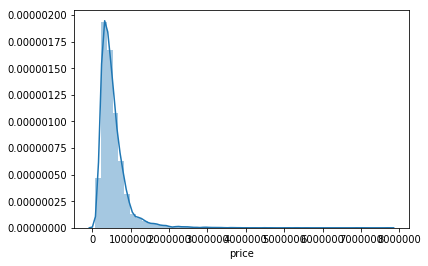

In [6]:
sns.distplot(data['price']);

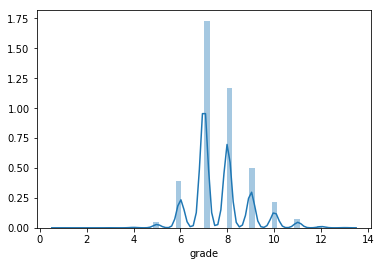

In [7]:
sns.distplot(data['grade']);

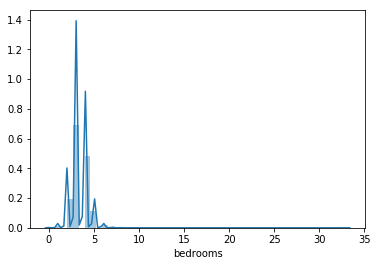

In [8]:
sns.distplot(data['bedrooms']);

<function matplotlib.pyplot.show(*args, **kw)>

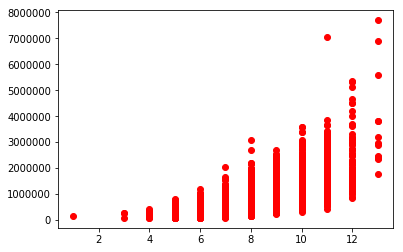

In [9]:
plt.plot(data['grade'],data['price'],'ro')
plt.show

In [10]:
#data=data.drop('waterfront',1)

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 30 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

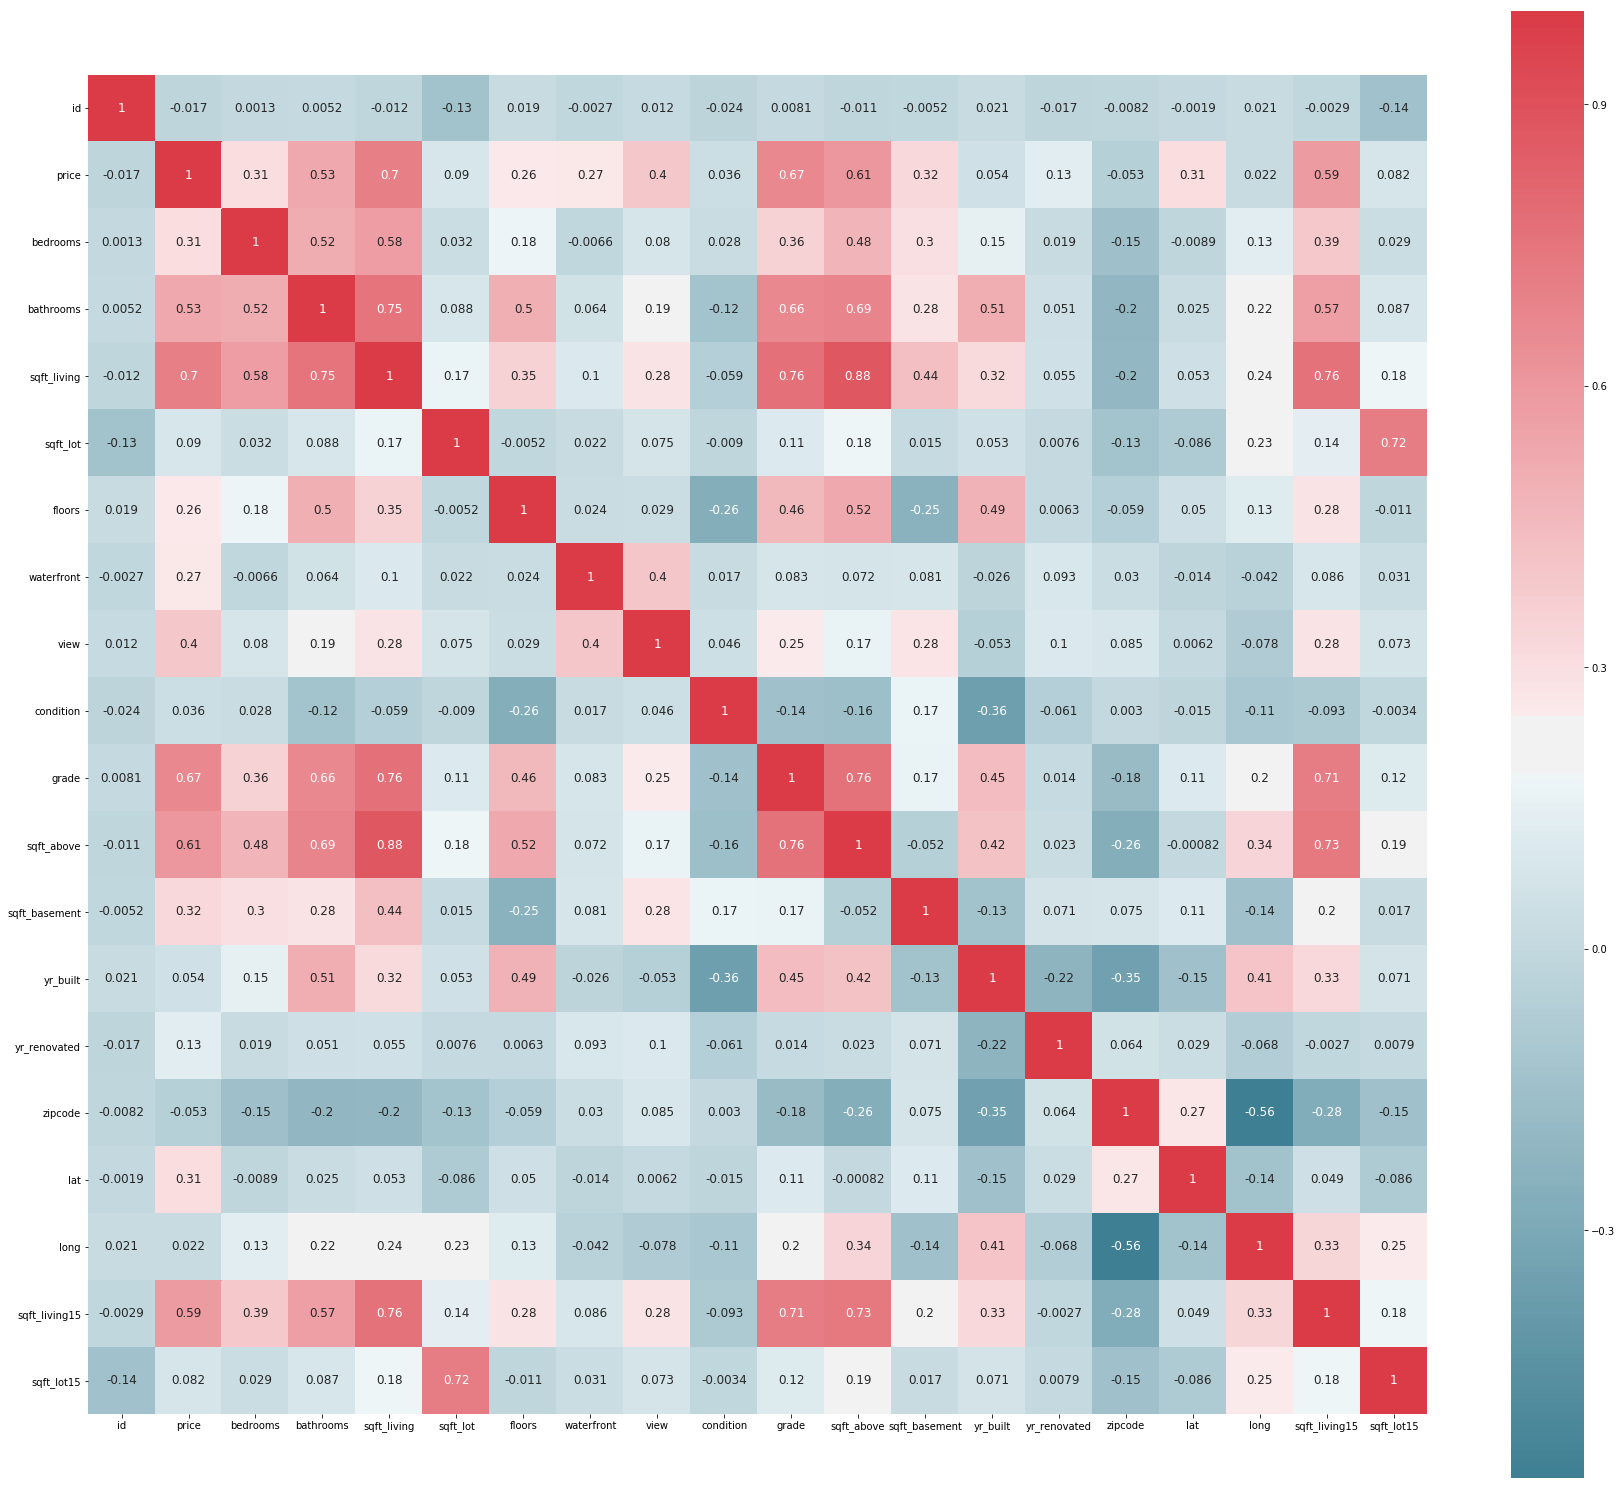

In [12]:
plot_correlation_map(data)

In [13]:
data[['grade','price']].groupby(['grade'],as_index=True).mean()

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


# the most important features

# the most important features are ( price , num: bedrooms,bathrooms, sqft ,grade ) 

# Split your dataset into a training set and a testing set

In [14]:
X = data[['sqft_living']]
y = data['price']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)

# Linear regression

In [16]:
model = LinearRegression ()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print("MSE :",metrics.mean_squared_error(y_test,predicted))
print ("R squared :",metrics.r2_score(y_test,predicted))

       sqft_living
21568         3830
3040          2750
198           1910
16456         1730
19502         2420
...            ...
1652          1200
14622         2110
9634           960
9308          2740
9608          2360

[6484 rows x 1 columns]
[1032735.93293983  728278.57063997  491478.3999623  ...  223668.68312446
  725459.52098904  618335.63425391]
MSE : 63595386112.83997
R squared : 0.5053104226540768


# plot Linear regression

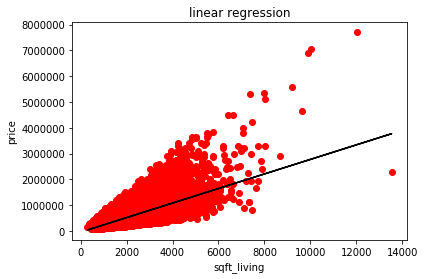

In [17]:
plt.scatter(X,y,color="r")
plt.title("linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X,model.predict(X),color='k')

# multi-linear regression

In [18]:
X = data[[ 'waterfront', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = data['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)


In [19]:
model = LinearRegression ()
model.fit(X_train, y_train)
print(X_test)
predicted = model.predict(X_test)
print(predicted)
print("MSE :",metrics.mean_squared_error(y_test,predicted))
print ("R squared :",metrics.r2_score(y_test,predicted))

       waterfront  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
21568           0         4        3.5         3830      8963     2.0     0   
3040            0         4        2.5         2750     16139     2.0     0   
198             0         3        2.5         1910     66211     2.0     0   
16456           0         3        2.0         1730     38884     1.0     0   
19502           0         5        3.0         2420     11250     2.0     0   
...           ...       ...        ...          ...       ...     ...   ...   
1652            0         2        1.0         1200      9488     1.0     0   
14622           0         4        3.0         2110      5000     1.5     2   
9634            0         3        1.0          960      4560     1.0     0   
9308            0         4        1.5         2740      4912     1.0     0   
9608            0         3        2.0         2360      4800     2.0     0   

       condition  grade  sqft_above  sqft_basement 

# polynomial regression

In [20]:
X = data[[ 'waterfront', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = data['price']
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)
# model = LinearRegression ()
# model.fit(X_train, y_train)
# predicted = model.predict(X_test)


In [21]:


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)
model2 = LinearRegression ()
poly =PolynomialFeatures(degree=2)
Xx = poly.fit_transform (X_train)
model2.fit(Xx, y_train)
Xxx = poly.fit_transform (X_test)
predicted2 = model2.predict(Xxx)
print("MSE :",metrics.mean_squared_error(y_test,predicted2))
print ("R squared :",metrics.r2_score(y_test,predicted2))

MSE : 24074058371.282
R squared : 0.8127350663527759


In [22]:
X = data[['waterfront', 'bedrooms', 'bathrooms']]
y = data['price']


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3 , random_state=40)
model2 = LinearRegression ()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
model2.predict([[1,2,3]])

array([1766904.26608304])